# Performance evaluation of our SeTA-based annotation approach

In [1]:

import sys, os
import json
module_path = os.path.abspath(os.getcwd() + '/..')
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
# read df_documents_with_final_cellar_seta_metadata_after_ingesting_docs.csv
df = pd.read_pickle('../correct_feedbacks_2/output/corrected_feedback_2023_10_12_15_19.pkl')
print(len(df))


831


In [2]:
df.head()

document_id                     date  \
0  KJNA31327ENN  2022-12-13 12:38:09,725   
1  KJNA31329ENN  2022-12-14 10:43:04,803   
2  KJNA31334ENN  2022-12-14 11:23:02,137   
3  KJNA31346ENN  2022-12-14 15:15:33,807   
4  KJNA31331ENN  2022-12-16 08:43:26,141   

                                       document_text  \
0  socrates social multi-criteria assessment of e...   
1  this report presents an assessment of european...   
2  the high performance liquid chromatography hpl...   
3  this joint research centre jrc technical repor...   
4  this report documents the criteria proposed to...   

   manualy_added_eurovoc_concepts  \
0                          [5311]   
1                     [5742, 602]   
2                              []   
3                              []   
4  [1278, c_838aa925, c_98d1408a]   

                           selected_eurovoc_concepts  \
0          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
1    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
2   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
3  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
4               [1534, 2530, 2538, 2896, 3144, 3535]   

                       not_selected_eurovoc_concepts  \
0  [2896, 1352, 2518, 427, 432, 5138, 5315, 5499,...   
1  [476, 141, 4485, 4853, 3988, 3885, 612, 1025, ...   
2  [2114, 2107, 2470, 2825, 3140, 3905, 2891, 588...   
3  [226, 4359, 453, 5237, 5283, 192, 838, 6770, 8...   
4  [5794, 6398, 2533, 2523, 2537, 2842, 4074, 237...   

                              cellar_id  \
0  90d83990-7b6b-11ed-9887-01aa75ed71a1   
1  8ec8609d-7c39-11ed-9887-01aa75ed71a1   
2  a94f0657-7c36-11ed-9887-01aa75ed71a1   
3  8ba3bd75-7c38-11ed-9887-01aa75ed71a1   
4  24ec839c-7f4e-11ed-9887-01aa75ed71a1   

                             cellar_eurovoc_concepts  \
0    [1835, 1894, 1895, 2451, 5311, 688, 7131, 8466]   
1  [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585...   
2   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
3  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
4  [1278, 1534, 2530, 2538, 2896, 3144, 3535, c_8...   

                               seta_eurovoc_concepts  \
0  [8466, 1894, 7131, 1895, 1835, 2451, 688, 2896...   
1  [2825, 4628, 3535, 5585, 3144, 2530, 2680, 134...   
2  [2919, 5742, 2896, 4426, 2924, 2395, 3660, 518...   
3  [4636, 3885, 1759, 5891, 2479, 4635, 1854, 289...   
4  [2538, 3144, 2896, 1534, 3535, 2530, 5794, 639...   

                           feedback_eurovoc_concepts  is_identical  \
0    [8466, 1894, 7131, 1895, 1835, 2451, 688, 5311]          True   
1  [2825, 4628, 3535, 5585, 3144, 2530, 2680, 134...          True   
2   [2919, 5742, 2896, 4426, 2924, 2395, 3660, 5188]          True   
3  [4636, 3885, 1759, 5891, 2479, 4635, 1854, 289...          True   
4  [2538, 3144, 2896, 1534, 3535, 2530, c_838aa92...          True   

                    selected_eurovoc_concepts_sorted  \
0          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
1    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
2   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
3  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
4               [1534, 2530, 2538, 2896, 3144, 3535]   

  manualy_added_eurovoc_concepts_sorted  
0                                [5311]  
1                           [5742, 602]  
2                                    []  
3                                    []  
4        [1278, c_838aa925, c_98d1408a]

In [3]:
from utils import tools

In [4]:
results = tools.compute_metrics(df, 'cellar_eurovoc_concepts', 'seta_eurovoc_concepts')

In [5]:
with open(f'output/cellar_annotator_results.json', 'w') as file:
    json.dump(results, file, indent=4)

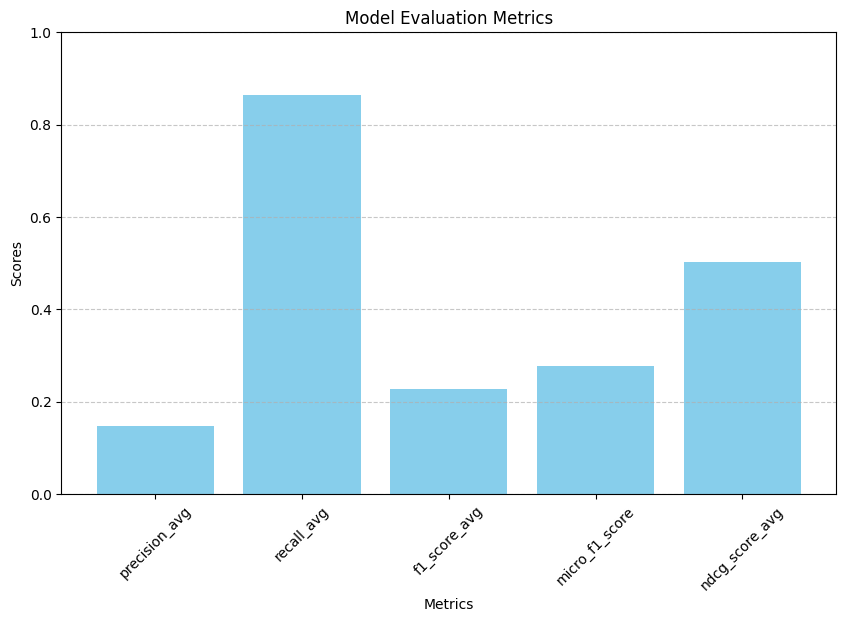

In [6]:
tools.plot_evaluation_metrics(results)

In [7]:
results_at_k = tools.compute_metrics_at_k(df, 'cellar_eurovoc_concepts', 'seta_eurovoc_concepts')

In [8]:
with open(f'output/cellar_annotator_k_results.json', 'w') as file:
    json.dump(results_at_k, file, indent=4)

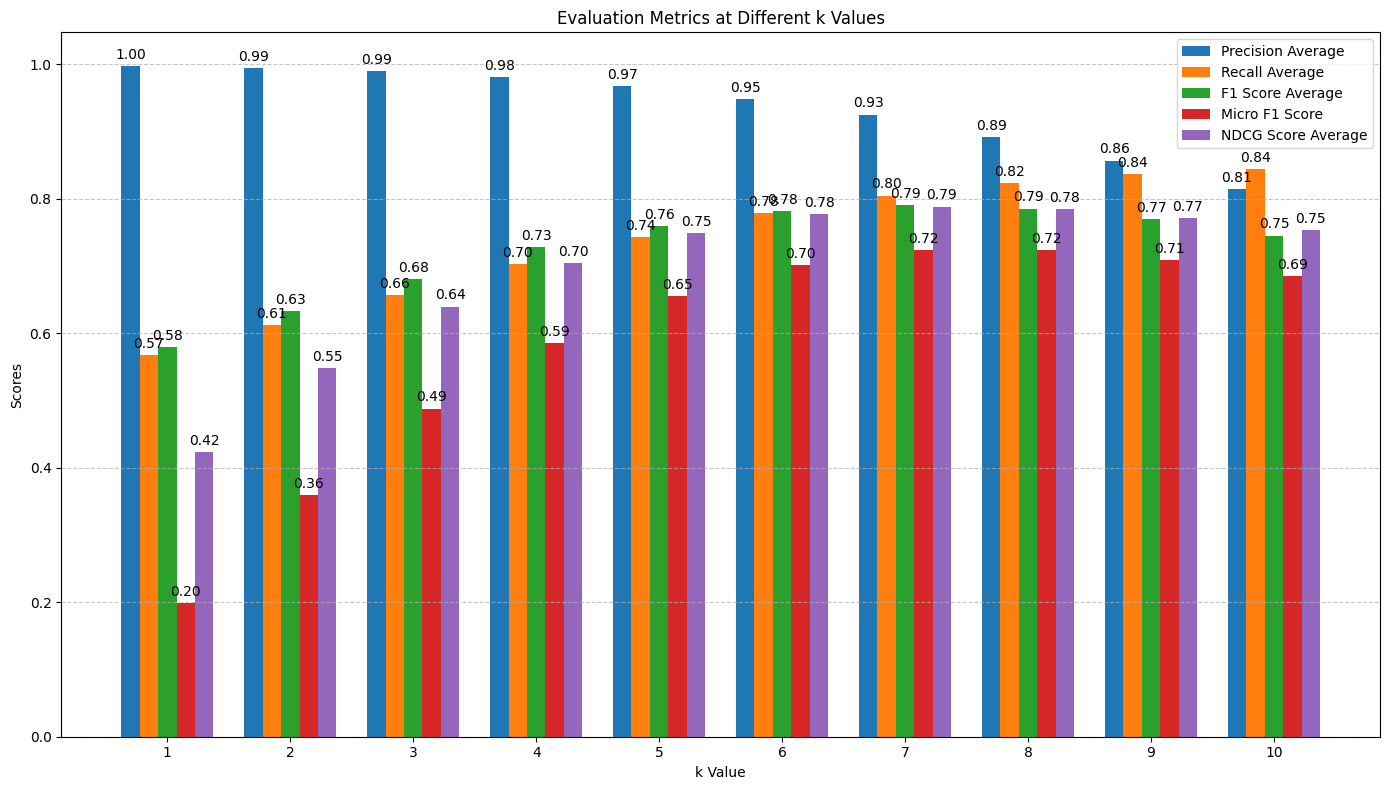

In [9]:
tools.plot_metrics_at_k(results_at_k)
